In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

In [2]:
Cm=1
g_Na, g_K, g_L =120,26,0.3
E_Na, E_K, E_L =60, -88, -54.387

Taken the value of all given parameter

In [3]:
def alpha_n(V): return 0.01*(V+55)/(1-np.exp(-(V+55)/10))
def beta_n(V):  return 0.125*np.exp(-(V+65)/80)
def alpha_m(V): return 0.1*(V+40)/(1-np.exp(-(V+40)/10))
def beta_m(V):  return 4*np.exp(-(V+65)/18)
def alpha_h(V): return 0.07*np.exp(-(V+65)/20)
def beta_h(V):  return 1/(1+np.exp(-(V+35)/10))

In [4]:
def  I_Na(V,m,h): return g_Na * m**3 * h *(V-E_Na)
def  I_K(V,n):    return g_K * n**4 *(V-E_K)
def  I_L(V):      return g_L * (V-E_L)



In [5]:
t = np.arange(0, 450, 0.01)
def I_inj(t):
    return 10*(t>100)-10*(t>200)+35*(t>300)-35*(t>400)
#t = np.arange(0, 450, 0.01)

#def I_inj(t):
    #return 15 * np.sin(2 * np.pi * 0.01 * t) * (t <= 300)

In [6]:
def daLLdt(X, t):
    V, m, h, n = X
    dVdt= (I_inj(t)-I_Na(V,m,h)-I_K(V,n)-I_L(V))/Cm
    dndt= alpha_n(V)*(1-n)-beta_n(V)*n
    dmdt= alpha_m(V)*(1-m)-beta_m(V)*m
    dhdt= alpha_h(V)*(1-h)-beta_h(V)*h
    return dVdt, dmdt, dhdt, dndt
     

In [7]:
X = odeint(daLLdt, [-65, 0.05, 0.6, 0.32], t)
V = X[:,0]
m = X[:,1]
h = X[:,2]
n = X[:,3]
ina = I_Na(V,m,h)
ik  = I_K(V,n)
il  = I_L(V)

Text(0, 0.5, 'V (mV)')

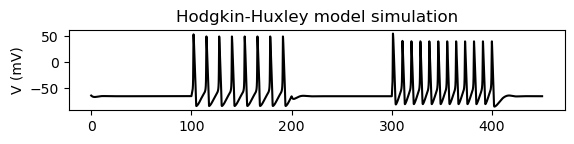

In [8]:
plt.figure()
plt.subplot(4,1,1)
plt.title("Hodgkin-Huxley model simulation")
plt.plot(t, V, 'k')
plt.ylabel('V (mV)')            

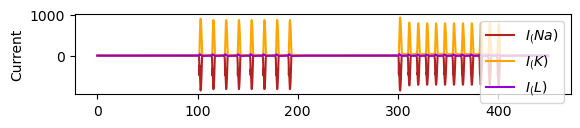

In [9]:
plt.subplot(4,1,2)
plt.plot(t, ina, 'firebrick', label='$I_(Na)$')
plt.plot(t, ik, 'orange', label='$I_(K)$')
plt.plot(t, il, 'darkviolet', label='$I_(L)$')
plt.ylabel('Current')
plt.legend()


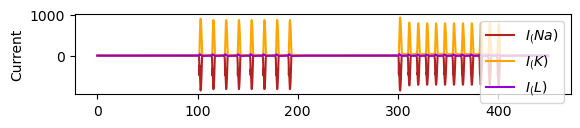

In [10]:
plt.subplot(4,1,2)
plt.plot(t, ina, 'firebrick', label='$I_(Na)$')
plt.plot(t, ik, 'orange', label='$I_(K)$')
plt.plot(t, il, 'darkviolet', label='$I_(L)$')
plt.ylabel('Current')
plt.legend()


<function matplotlib.pyplot.show(close=None, block=None)>

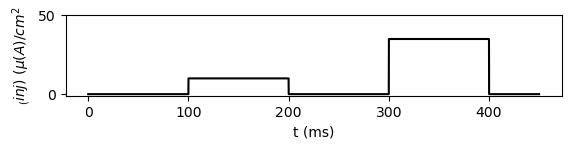

In [11]:
plt.subplot(4,1,4)
plt.plot(t, I_inj(t), 'k')
plt.xlabel('t (ms)')
plt. ylabel('$_(inj)$ ($\\mu(A)/cm^2$')
plt.ylim(-1, 50)

plt.show

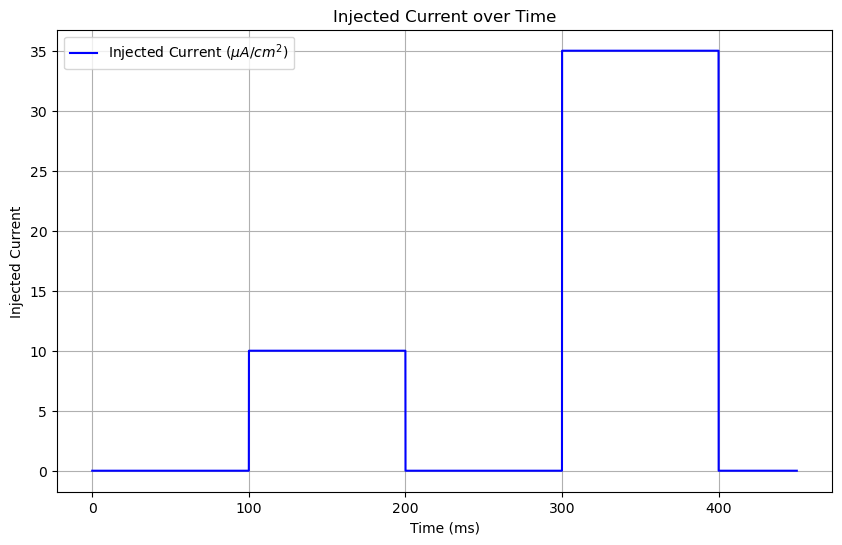

In [12]:
# Calculate injected current values
injected_current = I_inj(t)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(t, injected_current, 'b', label='Injected Current ($\mu A/cm^2$)')
plt.title('Injected Current over Time')
plt.xlabel('Time (ms)')
plt.ylabel('Injected Current')
plt.grid(True)
plt.legend()
plt.show()

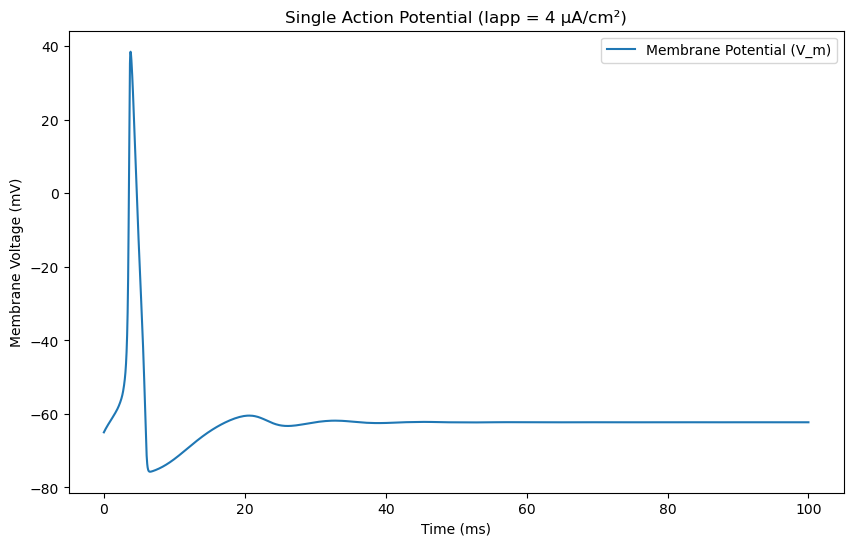

/var/folders/15/m87l0j917vj3xydhd079649c0000gn/T/ipykernel_24959/1824920026.py:26: RuntimeWarning: overflow encountered in exp
  return 0.1 * (25 - V) / (np.exp((25 - V) / 10) - 1)
/var/folders/15/m87l0j917vj3xydhd079649c0000gn/T/ipykernel_24959/1824920026.py:38: RuntimeWarning: overflow encountered in exp
  return 1 / (np.exp((30 - V) / 10) + 1)
/var/folders/15/m87l0j917vj3xydhd079649c0000gn/T/ipykernel_24959/1824920026.py:18: RuntimeWarning: overflow encountered in exp
  return 0.01 * (10 - V) / (np.exp((10 - V) / 10) - 1)
/var/folders/15/m87l0j917vj3xydhd079649c0000gn/T/ipykernel_24959/1824920026.py:30: RuntimeWarning: overflow encountered in exp
  return 4 * np.exp(-V / 18)
/var/folders/15/m87l0j917vj3xydhd079649c0000gn/T/ipykernel_24959/1824920026.py:34: RuntimeWarning: overflow encountered in exp
  return 0.07 * np.exp(-V / 20)
/var/folders/15/m87l0j917vj3xydhd079649c0000gn/T/ipykernel_24959/1824920026.py:22: RuntimeWarning: overflow encountered in exp
  return 0.125 * np.exp(-V 

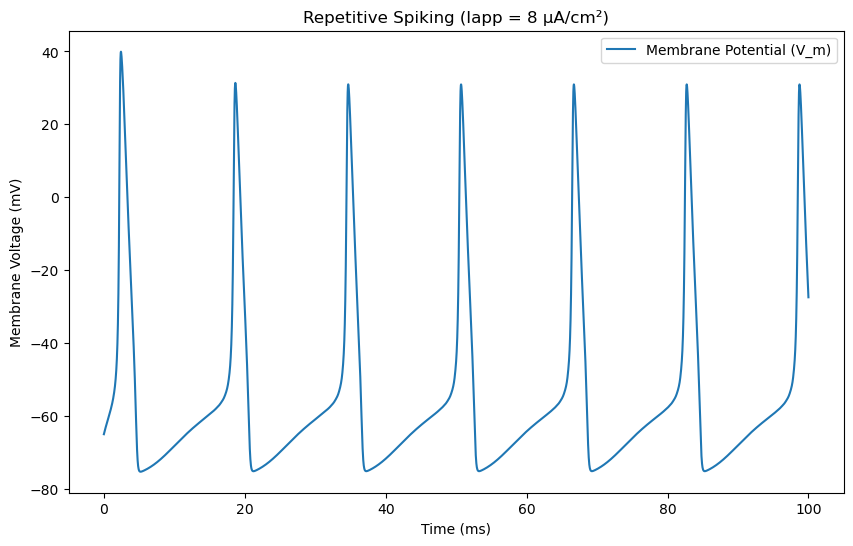

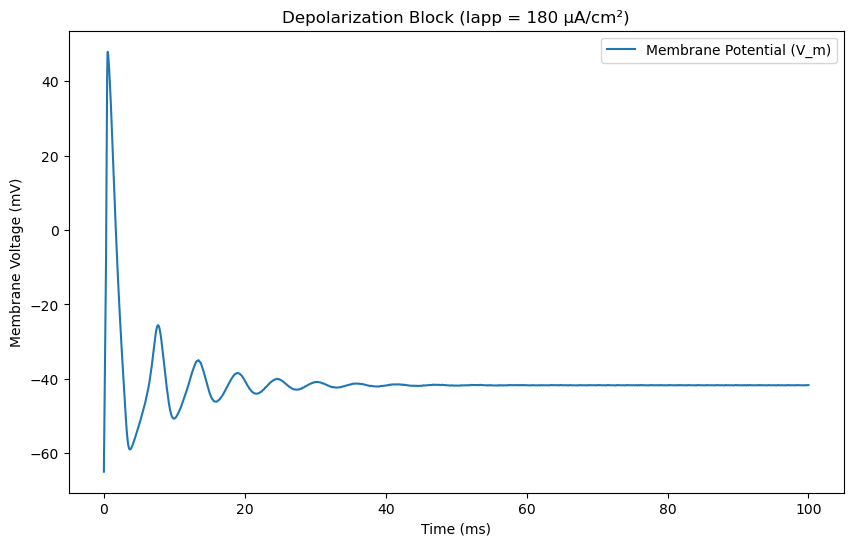

In [18]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Constants
C_m = 1.0  # Membrane capacitance (µF/cm^2)
g_Na = 120.0  # Maximum sodium conductance (mS/cm^2)
g_K = 36.0  # Maximum potassium conductance (mS/cm^2)
g_L = 0.3  # Leak conductance (mS/cm^2)
E_Na = 50.0  # Sodium Nernst potential (mV)
E_K = -77.0  # Potassium Nernst potential (mV)
E_L = -54.4  # Leak Nernst potential (mV)
V_rest = -65.0  # Resting membrane potential (mV)

# Voltage-dependent rate functions with Vm = V - V_rest
def alpha_n(Vm):
    V = Vm - V_rest
    return 0.01 * (10 - V) / (np.exp((10 - V) / 10) - 1)

def beta_n(Vm):
    V = Vm - V_rest
    return 0.125 * np.exp(-V / 80)

def alpha_m(Vm):
    V = Vm - V_rest
    return 0.1 * (25 - V) / (np.exp((25 - V) / 10) - 1)

def beta_m(Vm):
    V = Vm - V_rest
    return 4 * np.exp(-V / 18)

def alpha_h(Vm):
    V = Vm - V_rest
    return 0.07 * np.exp(-V / 20)

def beta_h(Vm):
    V = Vm - V_rest
    return 1 / (np.exp((30 - V) / 10) + 1)

# HH model equations
def HH_ODE(t, y, I_app):
    Vm, m, h, n = y

    # Ionic currents
    I_Na = g_Na * (m ** 3) * h * (Vm - E_Na)
    I_K = g_K * (n ** 4) * (Vm - E_K)
    I_L = g_L * (Vm - E_L)

    # Derivatives
    dVdt = (I_app - I_Na - I_K - I_L) / C_m
    dmdt = alpha_m(Vm) * (1 - m) - beta_m(Vm) * m
    dhdt = alpha_h(Vm) * (1 - h) - beta_h(Vm) * h
    dndt = alpha_n(Vm) * (1 - n) - beta_n(Vm) * n

    return [dVdt, dmdt, dhdt, dndt]

# Solve the HH equations
def solve_HH(I_app, t_max=100, dt=0.01):
    t_span = (0, t_max)
    t_eval = np.arange(0, t_max, dt)
    
    # Initial conditions
    Vm0 = V_rest
    m0 = alpha_m(Vm0) / (alpha_m(Vm0) + beta_m(Vm0))
    h0 = alpha_h(Vm0) / (alpha_h(Vm0) + beta_h(Vm0))
    n0 = alpha_n(Vm0) / (alpha_n(Vm0) + beta_n(Vm0))
    y0 = [Vm0, m0, h0, n0]

    sol = solve_ivp(HH_ODE, t_span, y0, args=(I_app,), t_eval=t_eval, method='RK45')
    
    return sol.t, sol.y

# Plot results
def plot_HH(I_app, title):
    t, y = solve_HH(I_app)
    Vm, m, h, n = y

    plt.figure(figsize=(10, 6))
    plt.plot(t, Vm, label="Membrane Potential (V_m)")
    plt.xlabel("Time (ms)")
    plt.ylabel("Membrane Voltage (mV)")
    plt.title(title)
    plt.legend()
    plt.show()

# Simulate different current injections
plot_HH(4, "Single Action Potential (Iapp = 4 μA/cm²)")
plot_HH(8, "Repetitive Spiking (Iapp = 8 μA/cm²)")
plot_HH(180, "Depolarization Block (Iapp = 180 μA/cm²)")


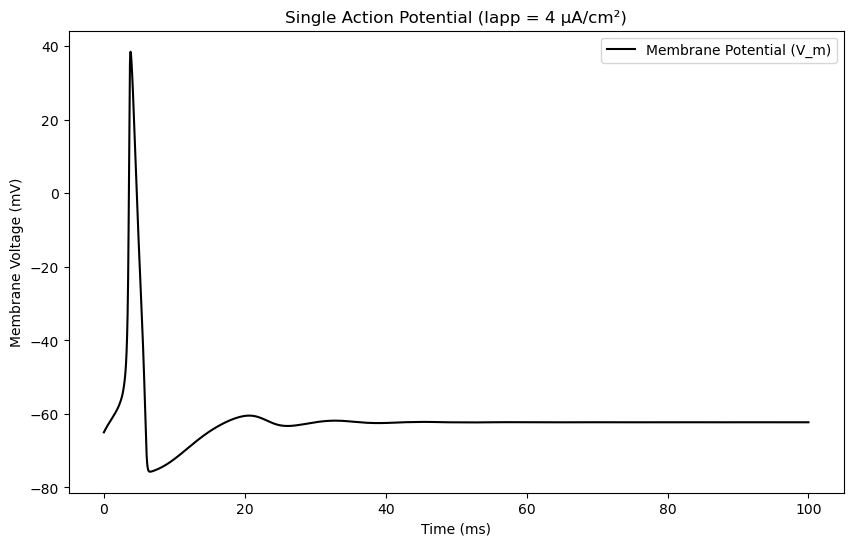

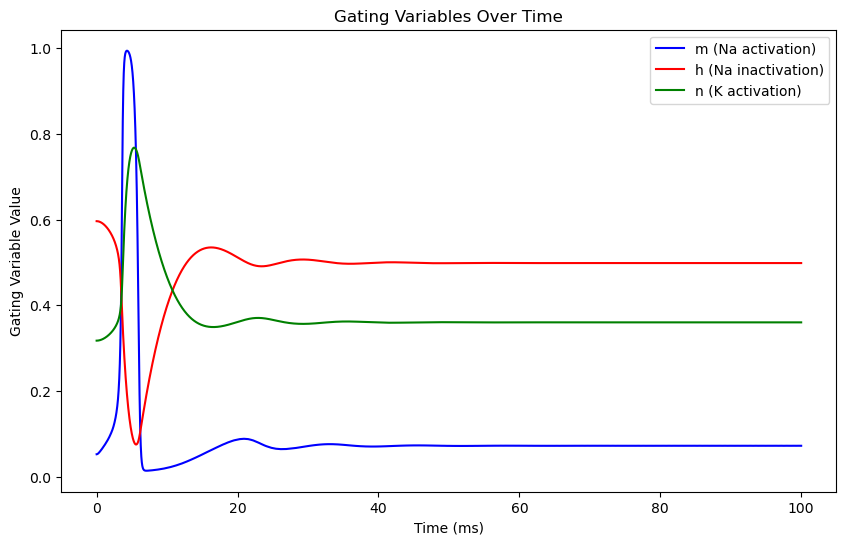

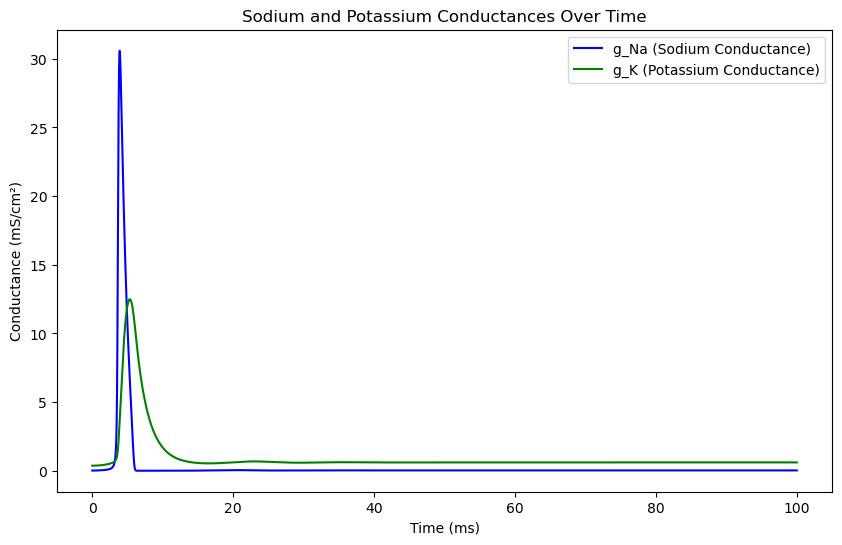

/var/folders/15/m87l0j917vj3xydhd079649c0000gn/T/ipykernel_24959/3473171654.py:18: RuntimeWarning: overflow encountered in exp
  def alpha_m(V): return 0.1 * (25 - V) / (np.exp((25 - V) / 10) - 1)
/var/folders/15/m87l0j917vj3xydhd079649c0000gn/T/ipykernel_24959/3473171654.py:21: RuntimeWarning: overflow encountered in exp
  def beta_h(V): return 1 / (np.exp((30 - V) / 10) + 1)
/var/folders/15/m87l0j917vj3xydhd079649c0000gn/T/ipykernel_24959/3473171654.py:16: RuntimeWarning: overflow encountered in exp
  def alpha_n(V): return 0.01 * (10 - V) / (np.exp((10 - V) / 10) - 1)
/var/folders/15/m87l0j917vj3xydhd079649c0000gn/T/ipykernel_24959/3473171654.py:19: RuntimeWarning: overflow encountered in exp
  def beta_m(V): return 4 * np.exp(-V / 18)
/var/folders/15/m87l0j917vj3xydhd079649c0000gn/T/ipykernel_24959/3473171654.py:20: RuntimeWarning: overflow encountered in exp
  def alpha_h(V): return 0.07 * np.exp(-V / 20)
/var/folders/15/m87l0j917vj3xydhd079649c0000gn/T/ipykernel_24959/3473171654.

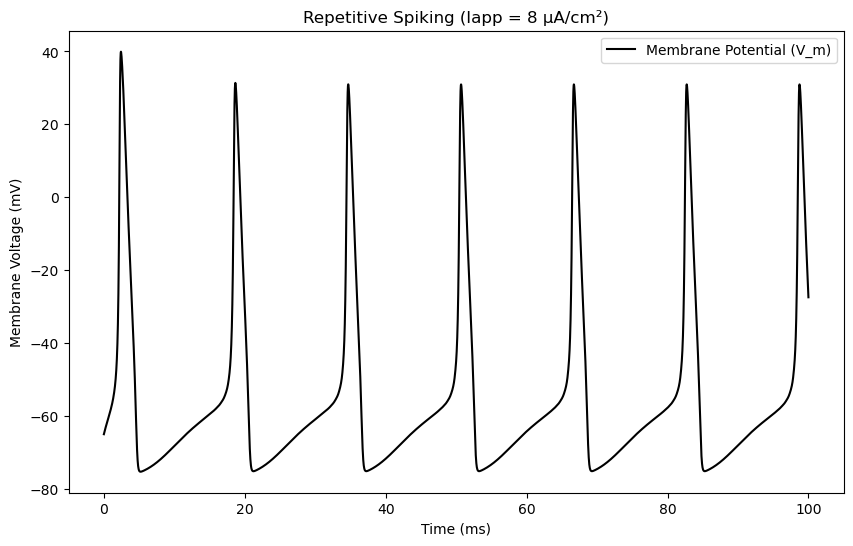

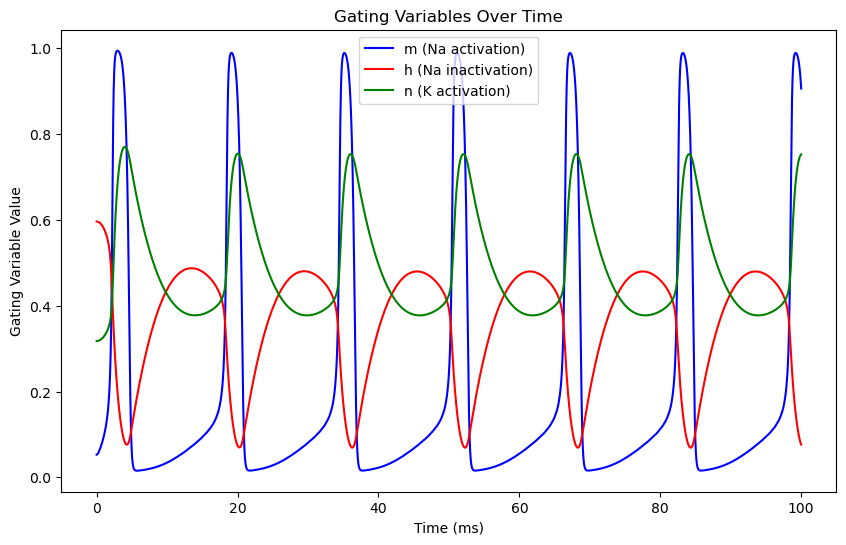

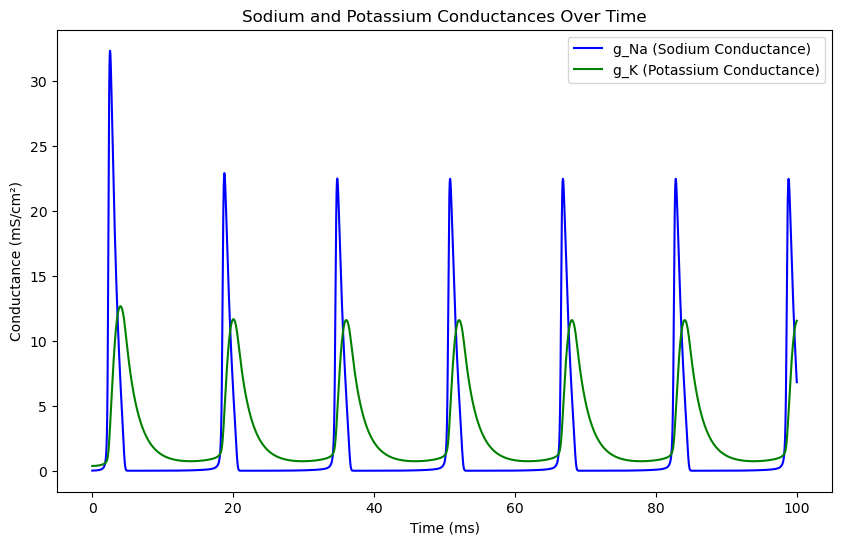

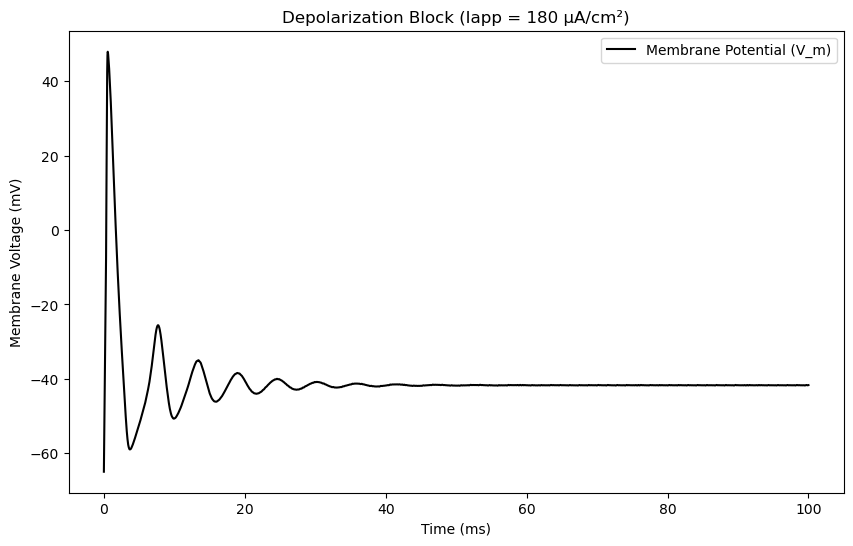

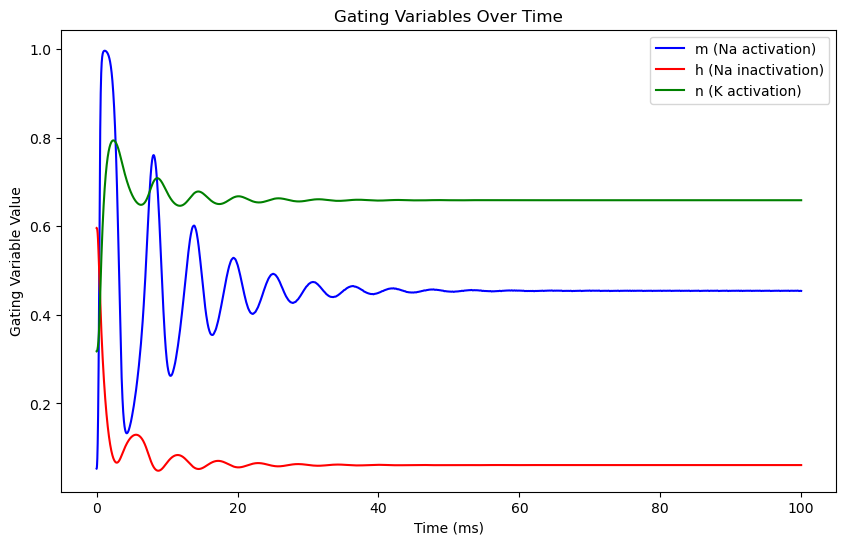

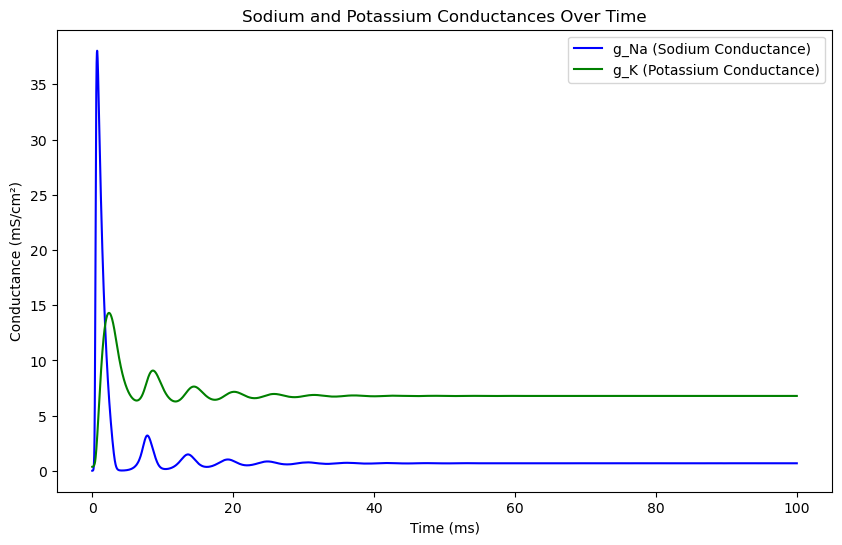

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

# Constants
C_m = 1.0  # Membrane capacitance (µF/cm^2)
g_Na = 120.0  # Maximum sodium conductance (mS/cm^2)
g_K = 36.0  # Maximum potassium conductance (mS/cm^2)
g_L = 0.3  # Leak conductance (mS/cm^2)
E_Na = 50.0  # Sodium Nernst potential (mV)
E_K = -77.0  # Potassium Nernst potential (mV)
E_L = -54.4  # Leak Nernst potential (mV)
V_rest = -65  # Resting membrane potential (mV)

# Voltage-dependent rate functions (V = Vm - V_rest)
def alpha_n(V): return 0.01 * (10 - V) / (np.exp((10 - V) / 10) - 1)
def beta_n(V): return 0.125 * np.exp(-V / 80)
def alpha_m(V): return 0.1 * (25 - V) / (np.exp((25 - V) / 10) - 1)
def beta_m(V): return 4 * np.exp(-V / 18)
def alpha_h(V): return 0.07 * np.exp(-V / 20)
def beta_h(V): return 1 / (np.exp((30 - V) / 10) + 1)

# HH model equations
def HH_ODE(t, y, I_app):
    V, m, h, n = y
    Vm = V - V_rest  # Adjusting voltage for gating variables

    # Ionic currents
    I_Na = g_Na * (m ** 3) * h * (V - E_Na)
    I_K = g_K * (n ** 4) * (V - E_K)
    I_L = g_L * (V - E_L) 

    # Derivatives
    dVdt = (I_app - I_Na - I_K - I_L) / C_m
    dmdt = alpha_m(Vm) * (1 - m) - beta_m(Vm) * m
    dhdt = alpha_h(Vm) * (1 - h) - beta_h(Vm) * h
    dndt = alpha_n(Vm) * (1 - n) - beta_n(Vm) * n

    return [dVdt, dmdt, dhdt, dndt]

# Solve the HH equations
def solve_HH(I_app, t_max=100, dt=0.01):
    t_span = (0, t_max)
    t_eval = np.arange(0, t_max, dt)
    
    # Initial conditions
    V0 = V_rest  # Resting membrane potential
    Vm0 = V0 - V_rest  # Adjusted for alpha/beta calculations
    m0 = alpha_m(Vm0) / (alpha_m(Vm0) + beta_m(Vm0))
    h0 = alpha_h(Vm0) / (alpha_h(Vm0) + beta_h(Vm0))
    n0 = alpha_n(Vm0) / (alpha_n(Vm0) + beta_n(Vm0))
    y0 = [V0, m0, h0, n0]

    sol = solve_ivp(HH_ODE, t_span, y0, args=(I_app,), t_eval=t_eval, method='RK45')
    
    return sol.t, sol.y

# Plot results
def plot_results(I_app, title):
    t, y = solve_HH(I_app)
    V, m, h, n = y

    # Compute conductances
    gNa_t = g_Na * (m ** 3) * h
    gK_t = g_K * (n ** 4)

    # Plot Membrane Potential
    plt.figure(figsize=(10, 6))
    plt.plot(t, V, label="Membrane Potential (V_m)", color="black")
    plt.xlabel("Time (ms)")
    plt.ylabel("Membrane Voltage (mV)")
    plt.title(title)
    plt.legend()
    plt.show()

    # Plot Gating Variables (m, h, n)
    plt.figure(figsize=(10, 6))
    plt.plot(t, m, label="m (Na activation)", color="blue")
    plt.plot(t, h, label="h (Na inactivation)", color="red")
    plt.plot(t, n, label="n (K activation)", color="green")
    plt.xlabel("Time (ms)")
    plt.ylabel("Gating Variable Value")
    plt.title("Gating Variables Over Time")
    plt.legend()
    plt.show()

    # Plot Conductances gNa and gK
    plt.figure(figsize=(10, 6))
    plt.plot(t, gNa_t, label="g_Na (Sodium Conductance)", color="blue")
    plt.plot(t, gK_t, label="g_K (Potassium Conductance)", color="green")
    plt.xlabel("Time (ms)")
    plt.ylabel("Conductance (mS/cm²)")
    plt.title("Sodium and Potassium Conductances Over Time")
    plt.legend()
    plt.show()

# Simulate different current injections
plot_results(4, "Single Action Potential (Iapp = 4 μA/cm²)")
plot_results(8, "Repetitive Spiking (Iapp = 8 μA/cm²)")
plot_results(180, "Depolarization Block (Iapp = 180 μA/cm²)")

In [14]:
def find_threshold_Iapp():
    I_low, I_high = 0, 10  # Initial range
    tol = 0.001  # Precision

    while I_high - I_low > tol:
        I_test = (I_low + I_high) / 2
        t, sol = simulate_hh(I_test)
        if np.max(sol[:, 0]) > 0:  # If spike occurs
            I_high = I_test
        else:
            I_low = I_test

    return round(I_high, 3)

threshold_Iapp = find_threshold_Iapp()
print("Threshold Iapp:", threshold_Iapp, "µA/cm²")

Threshold Iapp: 2.241 µA/cm²


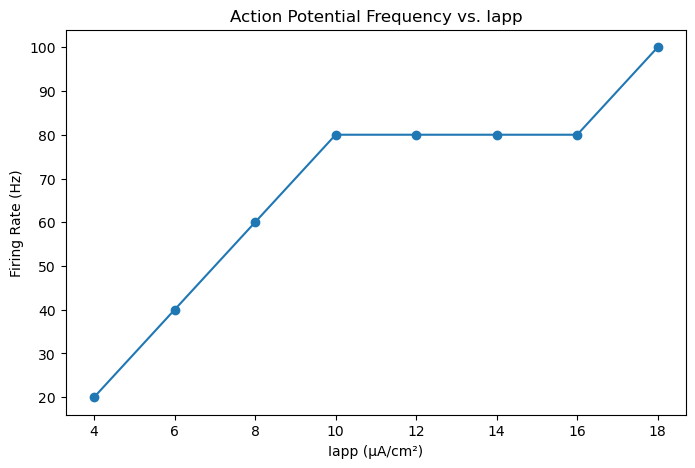

In [15]:
def count_spikes(V, threshold=0):
    spike_count = 0
    for i in range(1, len(V) - 1):
        if V[i-1] < threshold and V[i] >= threshold:
            spike_count += 1
    return spike_count

Iapp_values = np.arange(4, 20, 2)
frequencies = []

for Iapp in Iapp_values:
    t, sol = simulate_hh(Iapp)
    freq = count_spikes(sol[:, 0]) / (t[-1] / 1000)  # Convert to Hz
    frequencies.append(freq)

plt.figure(figsize=(8, 5))
plt.plot(Iapp_values, frequencies, marker='o')
plt.xlabel("Iapp (µA/cm²)")
plt.ylabel("Firing Rate (Hz)")
plt.title("Action Potential Frequency vs. Iapp")
plt.show()